In [1]:
###Relationship between forms of PCA
set.seed(1234)
x <- rnorm(100)
y <- rnorm(100)

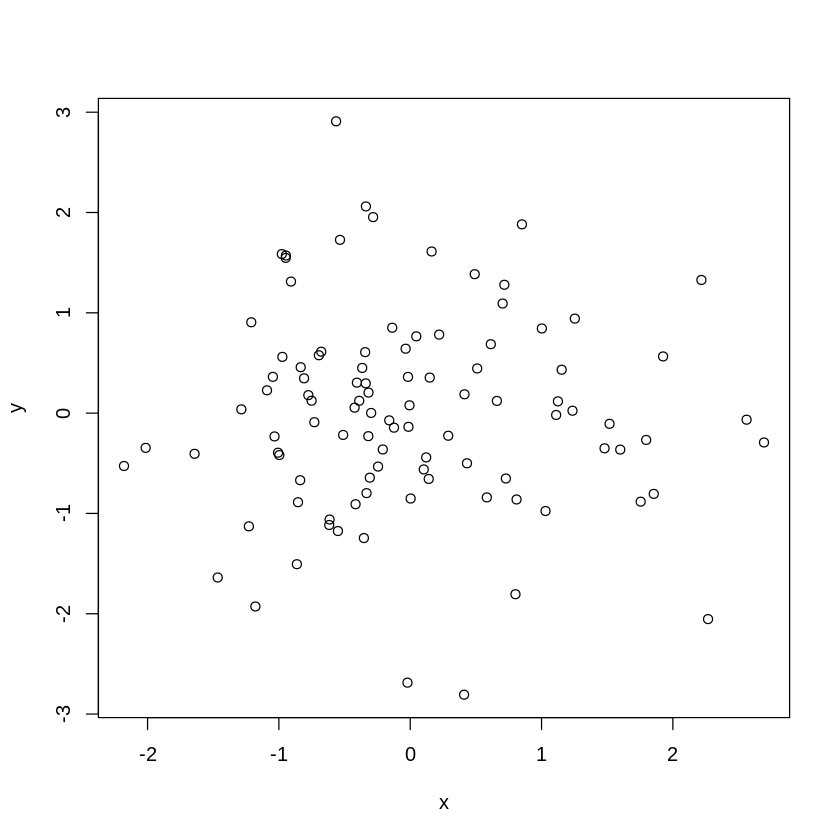

In [2]:
xyNorm <- cbind(x = (x - mean(x))/sd(x), y = (y - mean(y))/sd(y)) #normalize data
plot(xyNorm)

In [3]:
### Method one: eigendecomposition of covariance matrix
xyCov <- cov(xyNorm)
xyEigen <- eigen(xyCov) ###Eigen Decomposition off cov/cor matrix

### Method two: XVD
xySVD <- svd(xyNorm)   ###SVD is off the original data

### Method three: PCA
xyPCA   <- prcomp(xyNorm)
xyPCA.e <- princomp(xyNorm)

In [4]:
D <- matrix(0, ncol = 2, nrow = 2)
diag(D) <- xySVD$d

In [5]:
###names of things in prcomp
###The Loadings
xyPCA$rotation 

xySVD$v

xyPCA.e$loadings
xyEigen$vectors

,PC1,PC2
x,0.7071068,0.7071068
y,-0.7071068,0.7071068


0.7071068,0.7071068
-0.7071068,0.7071068



Loadings:
  Comp.1 Comp.2
x  0.707  0.707
y -0.707  0.707

               Comp.1 Comp.2
SS loadings       1.0    1.0
Proportion Var    0.5    0.5
Cumulative Var    0.5    1.0

-0.7071068,-0.7071068
0.7071068,-0.7071068


In [6]:
###The PCs
head(xyPCA$x)
head(xySVD$u %*% D)
head(xyPCA.e$scores)
head(xyNorm %*% xyEigen$vectors) ###Need to transform against the original data

PC1,PC2
-0.9951379,-0.48370154
0.6591358,-0.04779014
0.8568582,0.89076895
-1.1685431,-1.91350244
1.0065769,-0.18164249
0.3804840,0.55277041


-0.9951379,-0.48370154
0.6591358,-0.04779014
0.8568582,0.89076895
-1.1685431,-1.91350244
1.0065769,-0.18164249
0.3804840,0.55277041


Comp.1,Comp.2
-0.9951379,-0.48370154
0.6591358,-0.04779014
0.8568582,0.89076895
-1.1685431,-1.91350244
1.0065769,-0.18164249
0.3804840,0.55277041


0.9951379,0.48370154
-0.6591358,0.04779014
-0.8568582,-0.89076895
1.1685431,1.91350244
-1.0065769,0.18164249
-0.3804840,-0.55277041


In [18]:
print(xySVD$d)
print(xyPCA$sdev^2)
print(xyEigen$values)

[1] 10.075361  9.822785
[1] 1.0253829 0.9746171
[1] 1.0253829 0.9746171


In [20]:
print(xySVD$d^2 / (nrow(xySVD$u)-1))
print(xyPCA$sdev^2)
print(xyEigen$values)

[1] 1.0253829 0.9746171
[1] 1.0253829 0.9746171
[1] 1.0253829 0.9746171


More explanation:
- [Running PCA and SVD in R](http://genomicsclass.github.io/book/pages/pca_svd.html)
- [Relationship between SVD and PCA. How to use SVD to perform PCA?](https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca)

In [7]:
###Regenerate Data - Can't regenerate from the direct eigen decomposition 
head(xySVD$u %*% D %*% t(xySVD$v))
head(xyPCA$x %*% t(xyPCA$rotation))
head(xyPCA.e$scores %*% t(xyPCA.e$loadings))
head(xyNorm)

-1.0456974,0.36164012
0.4322866,-0.49987210
1.2357590,0.02397851
-2.1793353,-0.52676577
0.5833167,-0.84019802
0.6599105,0.12182488


x,y
-1.0456974,0.36164012
0.4322866,-0.49987210
1.2357590,0.02397851
-2.1793353,-0.52676577
0.5833167,-0.84019802
0.6599105,0.12182488


x,y
-1.0456974,0.36164012
0.4322866,-0.49987210
1.2357590,0.02397851
-2.1793353,-0.52676577
0.5833167,-0.84019802
0.6599105,0.12182488


x,y
-1.0456974,0.36164012
0.4322866,-0.49987210
1.2357590,0.02397851
-2.1793353,-0.52676577
0.5833167,-0.84019802
0.6599105,0.12182488


# One more try

```
### Method one: eigendecomposition of covariance matrix
xyCov <- cov(xyNorm)
xyEigen <- eigen(xyCov) ###Eigen Decomposition off cov/cor matrix

### Method two: XVD
xySVD <- svd(xyNorm)   ###SVD is off the original data

### Method three: PCA
xyPCA   <- prcomp(xyNorm)
xyPCA.e <- princomp(xyNorm)
```

In [25]:
xyEigen2 = eigen(t(xyNorm) %*% xyNorm)
xyEigen2$values

[1] 101.5129  96.4871

In [27]:
xySVD <- svd(xyNorm)
xySVD$d^2

[1] 101.5129  96.4871